In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import requests
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import XML, fromstring, tostring
import pandas as pd
import time

In [2]:
import osmnx as ox
import networkx as nx
import re

In [3]:
from get_speeds import *

In [ ]:
#importing the graph from osmnx

In [4]:
place_name="Washington DC, USA"
G = ox.graph_from_place(place_name,network_type='drive', simplify=True)

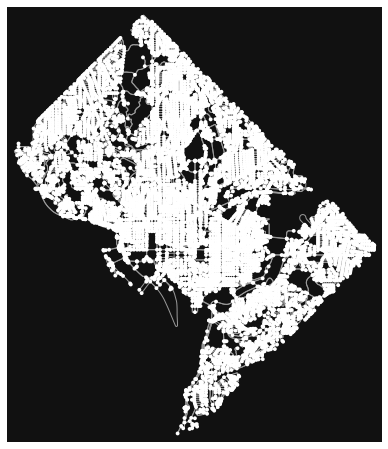

In [ ]:
fig, ax = ox.plot_graph(G)


In [ ]:
API_KEY='EuBWKTOquw60Mdj8U9Tu&app_code=aEJDOiovLnfYhC6jcT_pkA'
get_edge_speeds(G,API_KEY)

C:\Users\skand\Dropbox\company\blog\here-osmnx\get_speeds.py:29: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 29 of the file C:\Users\skand\Dropbox\company\blog\here-osmnx\get_speeds.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(page.text)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  53 

[Parallel(n_jobs=-1)]: Done 8289 tasks      | elapsed: 112.8min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed: 114.5min
[Parallel(n_jobs=-1)]: Done 8549 tasks      | elapsed: 116.3min
[Parallel(n_jobs=-1)]: Done 8680 tasks      | elapsed: 118.0min
[Parallel(n_jobs=-1)]: Done 8813 tasks      | elapsed: 119.8min
[Parallel(n_jobs=-1)]: Done 8946 tasks      | elapsed: 121.6min
[Parallel(n_jobs=-1)]: Done 9081 tasks      | elapsed: 123.4min
[Parallel(n_jobs=-1)]: Done 9216 tasks      | elapsed: 125.2min
[Parallel(n_jobs=-1)]: Done 9353 tasks      | elapsed: 127.0min
[Parallel(n_jobs=-1)]: Done 9490 tasks      | elapsed: 128.9min
[Parallel(n_jobs=-1)]: Done 9629 tasks      | elapsed: 130.8min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed: 132.7min
[Parallel(n_jobs=-1)]: Done 9909 tasks      | elapsed: 134.6min
[Parallel(n_jobs=-1)]: Done 10050 tasks      | elapsed: 136.4min
[Parallel(n_jobs=-1)]: Done 10193 tasks      | elapsed: 138.4min
[Parallel(n_jobs=-1)]: Done 10336 task

[Parallel(n_jobs=-1)]: Done 32736 tasks      | elapsed: 442.3min
[Parallel(n_jobs=-1)]: Done 32993 tasks      | elapsed: 445.8min
[Parallel(n_jobs=-1)]: Done 33250 tasks      | elapsed: 449.3min
[Parallel(n_jobs=-1)]: Done 33509 tasks      | elapsed: 452.7min
[Parallel(n_jobs=-1)]: Done 33768 tasks      | elapsed: 456.2min
[Parallel(n_jobs=-1)]: Done 34029 tasks      | elapsed: 459.7min
[Parallel(n_jobs=-1)]: Done 34290 tasks      | elapsed: 463.2min
[Parallel(n_jobs=-1)]: Done 34553 tasks      | elapsed: 466.8min
[Parallel(n_jobs=-1)]: Done 34816 tasks      | elapsed: 470.3min
[Parallel(n_jobs=-1)]: Done 35081 tasks      | elapsed: 473.9min
[Parallel(n_jobs=-1)]: Done 35346 tasks      | elapsed: 477.4min
[Parallel(n_jobs=-1)]: Done 35613 tasks      | elapsed: 481.1min
[Parallel(n_jobs=-1)]: Done 35880 tasks      | elapsed: 484.7min
[Parallel(n_jobs=-1)]: Done 36149 tasks      | elapsed: 488.3min
[Parallel(n_jobs=-1)]: Done 36418 tasks      | elapsed: 491.7min
[Parallel(n_jobs=-1)]: Do

In [6]:
df_es=pd.read_csv('df_es.csv')
df_speeds=pd.read_csv('df_speeds.csv')

df_es.columns=['unk','u','v','key','d','speeds','longitude','latitude']

b=df_es.copy()
b['speeds_rat']=df_es['speeds']/df_speeds['speeds_f']

In [6]:
wbr=np.where(b['speeds_rat']<=0.25)
wr=np.where((b['speeds_rat']<=0.5) & (b['speeds_rat']>0.25))
wy=np.where((b['speeds_rat']<=0.75) & (b['speeds_rat']>0.5))
wg=np.where(b['speeds_rat']>0.75)

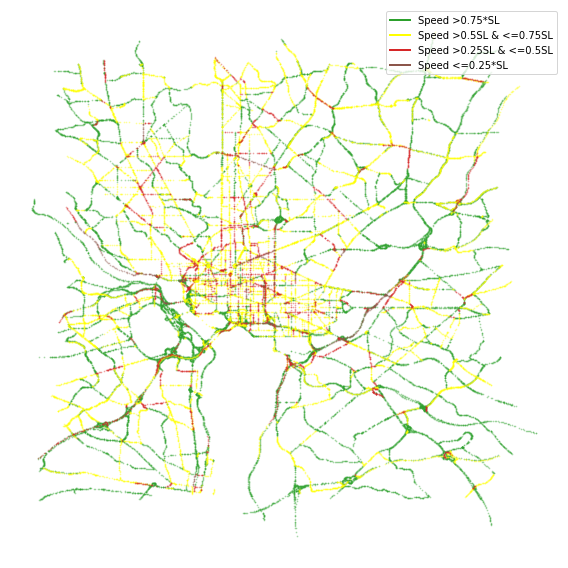

In [7]:
from matplotlib.lines import Line2D
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(b.longitude.values[wg], b.latitude.values[wg],'o',color='tab:green',markersize=0.8,alpha=0.3)
ax.plot(b.longitude.values[wy], b.latitude.values[wy],'o',color='yellow',markersize=0.8,alpha=0.3)
ax.plot(b.longitude.values[wr], b.latitude.values[wr],'o',color='tab:red',markersize=0.8,alpha=0.3)
ax.plot(b.longitude.values[wbr], b.latitude.values[wbr],'o',color='tab:brown',markersize=0.8,alpha=0.3)
ax.axis('off')

legend_elements = [Line2D([0], [0], color='tab:green', lw=2, label='Speed >0.75*SL'),
                   Line2D([0], [0], color='yellow', lw=2, label='Speed >0.5SL & <=0.75SL'),
                   Line2D([0], [0], color='tab:red', lw=2, label='Speed >0.25SL & <=0.5SL'),
                   Line2D([0], [0], color='tab:brown', lw=2, label='Speed <=0.25*SL')]
ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()

In [15]:
b2=b[b['d']<0.01]

In [16]:
wbr=np.where(b2['speeds_rat']<=0.25)
wr=np.where((b2['speeds_rat']<=0.5) & (b2['speeds_rat']>0.25))
wy=np.where((b2['speeds_rat']<=0.75) & (b2['speeds_rat']>0.5))
wg=np.where(b2['speeds_rat']>0.75)

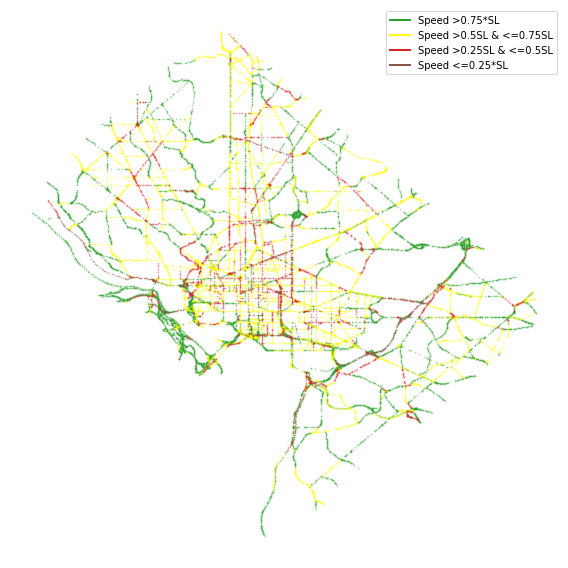

In [17]:
from matplotlib.lines import Line2D
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(b2.longitude.values[wg], b2.latitude.values[wg],'o',color='tab:green',markersize=0.8,alpha=0.3)
ax.plot(b2.longitude.values[wy], b2.latitude.values[wy],'o',color='yellow',markersize=0.8,alpha=0.3)
ax.plot(b2.longitude.values[wr], b2.latitude.values[wr],'o',color='tab:red',markersize=0.8,alpha=0.3)
ax.plot(b2.longitude.values[wbr], b2.latitude.values[wbr],'o',color='tab:brown',markersize=0.8,alpha=0.3)
ax.axis('off')

legend_elements = [Line2D([0], [0], color='tab:green', lw=2, label='Speed >0.75*SL'),
                   Line2D([0], [0], color='yellow', lw=2, label='Speed >0.5SL & <=0.75SL'),
                   Line2D([0], [0], color='tab:red', lw=2, label='Speed >0.25SL & <=0.5SL'),
                   Line2D([0], [0], color='tab:brown', lw=2, label='Speed <=0.25*SL')]
ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()


In [8]:
df_es=pd.read_csv('df_es.csv')
edges1=add_edge_speeds(G,df_es,0.01) #change cutoff as necessary

In [9]:
edges1.head()

osmid lanes  \
u        v          key                                 
49184747 937305437  0                 422411000     2   
         49198976   0                 535468569     2   
         49786378   0    [520475705, 535468796]   NaN   
49190879 7133191832 0                 346681295     2   
49198976 49184747   0                 535468569     2   

                                                name      highway  oneway  \
u        v          key                                                     
49184747 937305437  0       Western Avenue Northwest    secondary   False   
         49198976   0       Western Avenue Northwest    secondary   False   
         49786378   0    Chesapeake Street Northwest  residential   False   
49190879 7133191832 0       Eastern Avenue Northwest     tertiary   False   
49198976 49184747   0       Western Avenue Northwest    secondary   False   

                          length  speed_kph  travel_time  \
u        v          key                                    
49184747 937305437  0     11.101       14.7          2.7   
         49198976   0     68.420       14.8         16.6   
         49786378   0    121.540       14.1         31.0   
49190879 7133191832 0    156.098       17.0         33.1   
49198976 49184747   0     68.420       14.8         16.6   

                                                                  geometry  \
u        v          key                                                      
49184747 937305437  0                                                 None   
         49198976   0                                                 None   
         49786378   0    LINESTRING (-77.09817 38.95106, -77.09730 38.9...   
49190879 7133191832 0    LINESTRING (-77.01724 38.97733, -77.01727 38.9...   
49198976 49184747   0                                                 None   

                         ref maxspeed bridge junction access tunnel width  
u        v          key                                                    
49184747 937305437  0    NaN      NaN    NaN      NaN    NaN    NaN   NaN  
         49198976   0    NaN      NaN    NaN      NaN    NaN    NaN   NaN  
         49786378   0    NaN      NaN    NaN      NaN    NaN    NaN   NaN  
49190879 7133191832 0    NaN      NaN    NaN      NaN    NaN    NaN   NaN  
49198976 49184747   0    NaN      NaN    NaN      NaN    NaN    NaN   NaN